In [1]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


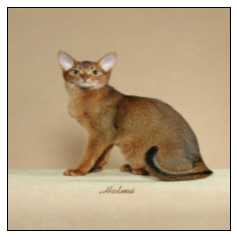

In [2]:
image = cv2.imread("images/Abyssinian_11.jpg") #read in BGR form
image2 = image[:,:,::-1] # transfer it back to RGB same as cv2.cvtColor(img, cv2.BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
res = cv2.resize(image2,(256,256),interpolation = cv2.INTER_LINEAR)
plt.imshow(res, cmap = "gray", interpolation = "bicubic")
plt.xticks([]), plt.yticks([])
plt.show()

In [177]:
res.shape

(256, 256, 3)

In [150]:
image = cv2.imread("images/Abyssinian_34.jpg")

In [3]:
#input is image, number of intervals for RGB 
#output is R*G*B vector
def color_histogram(image, Red_Int, Green_Int, Blue_Int):
    Rrange = range(0,255,256/Red_Int)
    Grange = range(0,255,256/Green_Int)
    Brange = range(0,255,256/Blue_Int)
    r1 = image[:,:,0]
    r2 = image[:,:,1]
    r3 = image[:,:,2]
    
    H1, edge1 = np.histogram(r1, bins = Rrange)
    H1 = np.hstack([H1,r1.size-sum(H1)])
    H2, edge2 = np.histogram(r2, bins = Grange)
    H2 = np.hstack([H2,r2.size-sum(H2)])
    H3, edge3 = np.histogram(r3, bins = Brange)
    H3 = np.hstack([H3,r3.size-sum(H3)])
    
    freq = []
    for i in range(len(H1)):
        for j in range(len(H2)):
            for k in range(len(H3)):
                freq.append(float(H1[i]*H2[j]*H3[k])/float(r1.size * r2.size *r3.size))
    return np.array(freq)    

In [4]:
# read all the files names 
from glob import glob
from os import path

def get_files_in(folder, pattern='*.txt'):
    return glob(path.join(folder, pattern))

def filenames(folder):
    filename = get_files_in(folder, '*.jpg')
    filename1 = get_files_in(folder, '*.mat')
    for i in range(len(filename1)):
        filename.append(filename1[i])
    return filename


In [5]:
# for each image take the feature to form matrix
def model_feature(file_dir, Red, Green, Blue):
    image_dir = filenames(file_dir)
    lable = []
    feature = []
    for i in range(len(image_dir)):
        image = cv2.imread(image_dir[i]) #read in BGR form
        if image == None:
            continue
        image2 = image[:,:,::-1] # convert to RGB
        res = cv2.resize(image2,(256,256),interpolation = cv2.INTER_LINEAR) #resize to 256*256
        feature.append(color_histogram(image2,Red,Green,Blue))
        if image_dir[i].split("/")[1][0].isupper() == True:
            lable.append(0) # 0 means cat
        else:
            lable.append(1) # 1 means dog
        #print i
    return np.array(feature), np.array(lable)
 

In [7]:
feature, lable = model_feature("images", 8,8,8)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [20]:
lable.shape

(7384,)

In [19]:
feature.shape

(7384, 512)

In [6]:
from sklearn import cross_validation, linear_model, metrics, datasets, tree, svm

In [10]:
X = feature
Y = lable
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [11]:
svm = svm.LinearSVC()
svm.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [14]:
print metrics.classification_report(Y_train, svm.predict(X_train))

             precision    recall  f1-score   support

          0       0.66      0.04      0.07      1939
          1       0.68      0.99      0.80      3968

avg / total       0.67      0.68      0.56      5907



In [16]:
print metrics.classification_report(Y_test, svm.predict(X_test))

             precision    recall  f1-score   support

          0       0.84      0.05      0.09       455
          1       0.70      1.00      0.82      1022

avg / total       0.74      0.70      0.60      1477



In [21]:
len(get_files_in('images', '*.jpg'))

7390

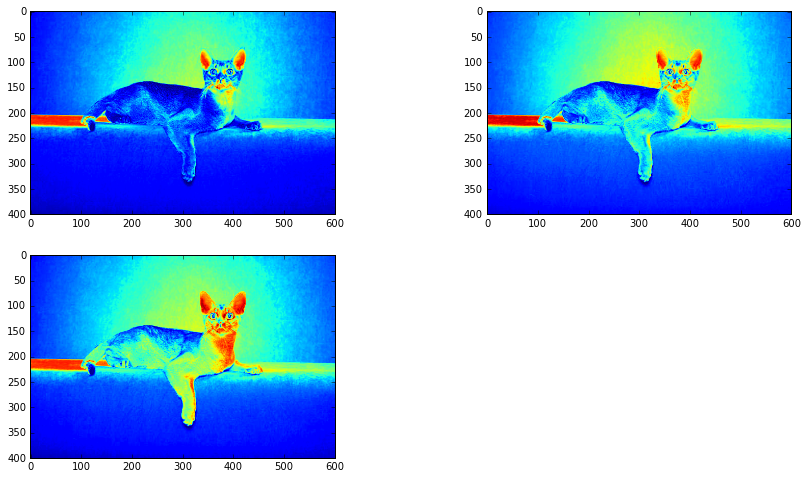

In [89]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image[:,:,0])

ax2 = fig.add_subplot(2,2,2)
plt.imshow(image[:,:,1])

ax3 = fig.add_subplot(2,2,3)
plt.imshow(image[:,:,2])